# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [1]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached certifi-2025.8.3-py3-none-any.whl (161 kB)
  Using cached pandas-2.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)


**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


*For this project, I want to analyze how air pollution levels vary across different cities and whether they relate to population size. I will use the Air Quality Index (AQI) dataset from Kaggle, which provides city-level air pollution information, and I will combine it with U.S. Census population estimates that give recent population counts for incorporated places of 20,000 or more. As a test case, I will focus specifically on U.S. cities to examine these relationships. This will help explore whether more populated cities tend to have higher levels of air pollution.*

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV File.

Method: The data was gathered using the "API" method from Kaggle.

Dataset variables:

*   *Rank* : Position of the city in the pollution ranking (1 = most polluted).
*   *City* : Name of the city and country.
*   *2021* : Annual average AQI (Air Quality Index) for 2021.
*   *JAN(2021), FEB(2021), …, DEC(2021)* : Monthly AQI values for 2021.
*   *2020, 2019, 2018, 2017* : Historical annual AQI averages for each year.

In [3]:
# Reinstall the Kaggle package cleanly for the current user
# Before using this, we had "/usr/bin/sh: 1: kaggle: not found"
!python -m pip install --user --upgrade --force-reinstall kaggle==1.6.12

  Using cached kaggle-1.6.12-py3-none-any.whl
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl (161 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Using cached bleach-6.2.0-py3-none-any.whl (163 kB)
  Using cached requests-2.32.5-py3-none-any.whl (64 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Using cached idna-3.10-py3-none-any.whl (70 kB)
  Using cached charset_normalizer-3.4.3-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (152 kB)
  Attempting uninstall: webencodings
    Found existing installation: webencodings 0.5.1
    Uninstalling webencodings-0.5.1:
      Successfully uninstalled webencodings-0.5.1
  At

In [4]:
#Import packages
import os
import zipfile
import pandas as pd

In [5]:
# Append the local binary path to the system PATH
os.environ["PATH"] += ":" + os.path.expanduser("~/.local/bin")

In [6]:
# Download the dataset from Kaggle using its dataset ID
!kaggle datasets download -d ramjasmaurya/most-polluted-cities-and-countries-iqair-index

Dataset URL: https://www.kaggle.com/datasets/ramjasmaurya/most-polluted-cities-and-countries-iqair-index
License(s): CC0-1.0
most-polluted-cities-and-countries-iqair-index.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
# Ensure the ZIP file was successfully downloaded before proceeding
assert os.path.exists("most-polluted-cities-and-countries-iqair-index.zip")

In [8]:
# Unzip the downloaded dataset into a folder named 'data'
with zipfile.ZipFile("most-polluted-cities-and-countries-iqair-index.zip", "r") as zip_ref:
    zip_ref.extractall("data")

In [9]:
aqi_df = pd.read_csv("data/AIR QUALITY INDEX (by cities) - IQAir.csv")

In [10]:
print(aqi_df.shape)
aqi_df.head()

(6475, 19)


,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
0,1,"Bhiwadi, India",106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,-
1,2,"Ghaziabad, India",102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163,106.6,110.2,135.2,144.6
2,3,"Hotan, China",101.5,-,-,158,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116,91.9
3,4,"Delhi, India",96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,"Jaunpur, India",95.3,182.2,143.5,91,70,51.1,40.7,33.5,34.2,36.8,75.7,196,195.7,-,-,-,-


#### Dataset 2

Type: XLSX File.

Method: The data was gathered using the "programmatically downloading" method from US Census Bureau.

Dataset variables:

* *Rank* : rank of the city/place based on its population as of 2024.  
* *Geographic Area* : name of the city and state.  
* *April 1, 2020 Estimates Base* : base population as of April 1, 2020.  
* *Population Estimate 2020* : estimated population as of July 1, 2020.  
* *Population Estimate 2021* : estimated population as of July 1, 2021.  
* *Population Estimate 2022* : estimated population as of July 1, 2022.  
* *Population Estimate 2023* : estimated population as of July 1, 2023.  
* *Population Estimate 2024* : estimated population as of July 1, 2024. 

In [11]:
import requests

In [12]:
# Create a folder to store the downloaded census file if it doesn't already exist
folder_name = "census_population"
os.makedirs(folder_name, exist_ok=True)

In [13]:
# Define the URL of the Excel file to download from the US Census Bureau
census_url = "https://www2.census.gov/programs-surveys/popest/tables/2020-2024/cities/totals/SUB-IP-EST2024-ANNRNK.xlsx"

In [14]:
# Send a GET request to download the Excel file from the given URL
response = requests.get(census_url, verify=False)

/home/student/.local/lib/python3.10/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www2.census.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [15]:
# Raise an error if the request fails
response.raise_for_status()

In [16]:
# Define the path to save the downloaded file
file_path = os.path.join(folder_name, "SUB-IP-EST2024-ANNRNK.xlsx")

In [17]:
# Save the file content to the specified path
with open(file_path, "wb") as f:
    f.write(response.content)

In [18]:
# Install the openpyxl library to read .xlsx Excel files
!python -m pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [19]:
# Set the path of the downloaded Excel file
census_path = "census_population/SUB-IP-EST2024-ANNRNK.xlsx"

In [20]:
# For unknown reasons, the openpyxl engine requires the notebook to be run twice
# On the first run, it always fails.

In [21]:
census_df = pd.read_excel(census_path, engine="openpyxl")

In [22]:
print(census_df.shape)
census_df.head()

(1944, 8)


,table with row headers in column B and column headers in rows 3 through 4 (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rank,Geographic Area,"April 1, 2020\nEstimates Base",Population Estimate (as of July 1),NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2020,2021.0,2022.0,2023.0,2024.0
3,1,"New York city, New York",8805594,8740306,8453772.0,8356179.0,8390888.0,8478072.0
4,2,"Los Angeles city, California",3899449,3896329,3830987.0,3832998.0,3847428.0,3878704.0


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### First dataframe (Air Quality Index dataframe)

In [23]:
aqi_df.head(10)

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
0,1,"Bhiwadi, India",106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,-
1,2,"Ghaziabad, India",102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163,106.6,110.2,135.2,144.6
2,3,"Hotan, China",101.5,-,-,158,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116,91.9
3,4,"Delhi, India",96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,"Jaunpur, India",95.3,182.2,143.5,91,70,51.1,40.7,33.5,34.2,36.8,75.7,196,195.7,-,-,-,-
5,6,"Faisalabad, Pakistan",94.2,207.1,118,71.2,44.6,51.2,44.7,50.4,50,51.9,-,234.5,241.7,73.2,104.6,130.4,-
6,7,"Noida, India",91.4,185.3,143.4,80.5,68.2,48,43.8,33.9,35,26.5,76.9,204.4,154.8,94.3,97.7,123.6,134
7,8,"Bahawalpur, Pakistan",91.0,173.9,145.1,77.3,51.4,45.2,54.4,42.2,43.7,38.2,67.2,197,221.2,78.7,-,-,-
8,9,"Peshawar, Pakistan",89.6,103.9,137.2,59.6,48,49.2,68.5,54.3,55.8,60.8,77.5,182.3,176.9,-,63.9,-,-
9,10,"Bagpat, India",89.1,146.1,106.3,88.3,87.1,65.7,53.9,32.8,31.5,24.3,84.7,213.6,128.1,-,88.6,-,-


In [24]:
aqi_df.tail(10)

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
6465,6466,"Exeter, Australia",2.7,1.7,1.8,2.1,2.9,5,4.2,3.3,2.6,2.6,1.6,1.6,1.8,3.7,3.6,3.2,3
6466,6467,"Salao, Portugal",2.7,2.1,3.5,2.2,2.6,2.2,2,2.8,10.3,4.5,2.8,2.7,2.7,3.6,3.8,4.3,3.4
6467,6468,"Alcoutim, Portugal",2.7,3.9,2.9,6.1,2.7,2.4,2.8,3.4,3.3,2.3,2.2,2.2,2.2,5.7,7.7,8.5,7.9
6468,6469,"Derby, Australia",2.6,1.8,2,2.2,3.5,3.8,3.5,3.4,2.4,2.6,1.8,1.8,1.6,3.7,3.4,3.5,3.2
6469,6470,"Gretna, Australia",2.6,1.4,1.4,2.4,2.1,3.8,4.7,4.4,3,2.4,1.8,1.5,1.4,3.1,4.7,3.1,3.1
6470,6471,"Mornington, Australia",2.4,2,1.9,2.3,2.1,3.2,3.6,4.3,2.1,2.1,1.7,2,1.9,3.2,3.8,3,3.9
6471,6472,"Emu River, Australia",2.1,1.9,1.8,2,2.6,3.4,2.6,1.9,2.1,2.2,1.5,1.4,1.5,2.6,2.5,2.6,2.3
6472,6473,"Judbury, Australia",2.0,1.6,1.5,2.1,1.5,4.1,2,2.2,2.2,1.7,1.5,1.4,1.7,2.4,5.7,2.2,1.9
6473,6474,"St Helens, Australia",1.9,1.8,2.1,2,2.4,2.7,1.6,1.6,1.6,1.9,1.6,2.4,1.6,2.4,2.4,2.9,3.3
6474,6475,"Chu, Kazakhstan",1.5,1.5,1.6,1.6,1.5,1.5,1.5,1.5,1.6,1.5,1.5,1.5,1.5,-,-,-,-


In [25]:
# Count missing values across all columns
aqi_df.isnull().sum()

Rank         0
City         0
2021         0
JAN(2021)    0
FEB(2021)    0
MAR(2021)    0
APR(2021)    0
MAY(2021)    0
JUN(2021)    0
JUL(2021)    0
AUG(2021)    0
SEP(2021)    0
OCT(2021)    0
NOV(2021)    0
DEC(2021)    0
2020         0
2019         0
2018         0
2017         0
dtype: int64

In [26]:
# Also check if there are dashes "-" instead of NaN
(aqi_df == "-").sum()

Rank            0
City            0
2021            0
JAN(2021)     671
FEB(2021)     574
MAR(2021)     193
APR(2021)     256
MAY(2021)      16
JUN(2021)      16
JUL(2021)      22
AUG(2021)       9
SEP(2021)      17
OCT(2021)      26
NOV(2021)      43
DEC(2021)      87
2020         2207
2019         2422
2018         3999
2017         4194
dtype: int64

In [27]:
# Check datatypes of all columns
aqi_df.dtypes

Rank           int64
City          object
2021         float64
JAN(2021)     object
FEB(2021)     object
MAR(2021)     object
APR(2021)     object
MAY(2021)     object
JUN(2021)     object
JUL(2021)     object
AUG(2021)     object
SEP(2021)     object
OCT(2021)     object
NOV(2021)     object
DEC(2021)     object
2020          object
2019          object
2018          object
2017          object
dtype: object

In [28]:
# Split the "City" column into city and country
aqi_df["City"].str.split(",", expand=True).head()

,0,1,2
0,Bhiwadi,India,None
1,Ghaziabad,India,None
2,Hotan,China,None
3,Delhi,India,None
4,Jaunpur,India,None


In [29]:
# Inspect column names to confirm wide format
list(aqi_df.columns)

['Rank',
 'City',
 '2021',
 'JAN(2021)',
 'FEB(2021)',
 'MAR(2021)',
 'APR(2021)',
 'MAY(2021)',
 'JUN(2021)',
 'JUL(2021)',
 'AUG(2021)',
 'SEP(2021)',
 'OCT(2021)',
 'NOV(2021)',
 'DEC(2021)',
 '2020',
 '2019',
 '2018',
 '2017']

### Quality Issue 1: Missing Values

**Visual inspection**: By looking at `.head()` and `.tail()`, we notice many missing values represented as dashes ("-") or blanks, especially in earlier years (2017–2020).  

**Programmatic inspection**: Using `aqi_df.isnull().sum()` or checking for "-" entries confirms missing values across multiple columns.  

**Justification**: This is a completeness issue because missing data for many cities prevents reliable time-series analysis.  
*Method justification*: Visual inspection is suitable to quickly detect obvious missing values, while programmatic checks systematically quantify them across the whole dataset.

### Quality Issue 2: Inconsistent Data Types

**Visual inspection**: Some columns expected to be numeric (e.g., AQI scores) contain dashes "–" instead of numbers.  

**Programmatic inspection**: Running `aqi_df.dtypes` shows that affected columns are stored as `object` instead of `float`.  

**Justification**: This is a validity issue, as the presence of non-numeric placeholders breaks the integrity of numeric columns.  
*Method justification*: Visual inspection detects unexpected symbols, while programmatic type-checking reveals misclassification of entire columns.  

### Tidiness Issue 1: Multiple Variables in One Column

**Visual inspection**: The column *City* stores both city and country (e.g., "Delhi, India").  

**Programmatic inspection**: Splitting with `aqi_df["City"].str.split(",")` shows two distinct variables.  

**Justification**: This violates the tidy data rule *each variable forms a column*. City and country should be separated.  
*Method justification*: Visual inspection highlights the pattern, while programmatic splitting confirms that two variables are consistently stored together.

### Tidiness Issue 2: Years Spread Across Columns

**Visual inspection**: There are separate columns for 2021, JAN(2021), FEB(2021), etc.  

**Programmatic inspection**: Listing the columns (`list(aqi_df.columns)`) reveals multiple time-based columns.  

**Justification**: This violates the tidy data rule *each variable forms a column*. Year (and month) should be a single column, with AQI values stored separately.  
*Method justification*: Visual inspection shows the wide format, while column listing programmatically proves that multiple year/month columns exist.  

### Second dataframe (Census population)

In [30]:
census_df.head(10)

,table with row headers in column B and column headers in rows 3 through 4 (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rank,Geographic Area,"April 1, 2020\nEstimates Base",Population Estimate (as of July 1),NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2020,2021.0,2022.0,2023.0,2024.0
3,1,"New York city, New York",8805594,8740306,8453772.0,8356179.0,8390888.0,8478072.0
4,2,"Los Angeles city, California",3899449,3896329,3830987.0,3832998.0,3847428.0,3878704.0
5,3,"Chicago city, Illinois",2748331,2745196,2706324.0,2684076.0,2699144.0,2721308.0
6,4,"Houston city, Texas",2300351,2298945,2291070.0,2314258.0,2346908.0,2390125.0
7,5,"Phoenix city, Arizona",1608415,1612593,1625132.0,1644798.0,1656231.0,1673164.0
8,6,"Philadelphia city, Pennsylvania",1603794,1600788,1589918.0,1570554.0,1563349.0,1573916.0
9,7,"San Antonio city, Texas",1434322,1439340,1454238.0,1475931.0,1502711.0,1526656.0


In [31]:
census_df.tail(10)

,table with row headers in column B and column headers in rows 3 through 4 (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
1934,1932,"Albany city, California",20270,20226,18920.0,19234.0,19243.0,19439.0
1935,1933,"Agoura Hills city, California",20296,20230,19800.0,19606.0,19518.0,19429.0
1936,1933,"Plainview city, Texas",20169,20125,19885.0,19614.0,19492.0,19429.0
1937,1935,"Coronado city, California",20199,20180,19257.0,18912.0,18657.0,18031.0
1938,The Census Bureau has reviewed this data produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1939,Note: An incorporated place is included if it ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1940,Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1941,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1942,"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,Release Date: May 2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Inspect non-data top rows
census_df.iloc[0:3]

,table with row headers in column B and column headers in rows 3 through 4 (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rank,Geographic Area,"April 1, 2020\nEstimates Base",Population Estimate (as of July 1),NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2020,2021.0,2022.0,2023.0,2024.0


In [33]:
# Inspect non-data bottom rows
census_df.iloc[1938:1942]

,table with row headers in column B and column headers in rows 3 through 4 (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
1938,The Census Bureau has reviewed this data produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1939,Note: An incorporated place is included if it ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1940,Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1941,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Count missing values across all columns
census_df.isnull().sum()

table with row headers in column B and column headers in rows 3 through 4 (leading dots indicate sub-parts)    1
Unnamed: 1                                                                                                     8
Unnamed: 2                                                                                                     8
Unnamed: 3                                                                                                     7
Unnamed: 4                                                                                                     8
Unnamed: 5                                                                                                     8
Unnamed: 6                                                                                                     8
Unnamed: 7                                                                                                     8
dtype: int64

In [35]:
# Check column dtypes
census_df.dtypes

table with row headers in column B and column headers in rows 3 through 4 (leading dots indicate sub-parts)     object
Unnamed: 1                                                                                                      object
Unnamed: 2                                                                                                      object
Unnamed: 3                                                                                                      object
Unnamed: 4                                                                                                     float64
Unnamed: 5                                                                                                     float64
Unnamed: 6                                                                                                     float64
Unnamed: 7                                                                                                     float64
dtype: object

In [36]:
# Inspect all column names for year columns
list(census_df.columns)

['table with row headers in column B and column headers in rows 3 through 4 (leading dots indicate sub-parts)',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7']

In [37]:
# Split the values in the "Unnamed: 1" column by comma into separate components
census_df["Unnamed: 1"].str.split(",").head(8)

0                                NaN
1                  [Geographic Area]
2                                NaN
3         [New York city,  New York]
4    [Los Angeles city,  California]
5          [Chicago city,  Illinois]
6             [Houston city,  Texas]
7           [Phoenix city,  Arizona]
Name: Unnamed: 1, dtype: object

### Quality Issue 1: Invalid Rows and Column Misalignment

**Visual inspection**: The header, and rows like “table with row headers in column B and column headers in rows 3 through 4 (leading dots indicate sub-parts)”, “The Census Bureau has reviewed this data product” and “Suggested Citation” appear as if they were data. The real headers are appearing as a data row.  

**Programmatic inspection**: Checking rows with `census_df.iloc[0:3]` and `census_df.iloc[1938:1942]` shows these non-data rows. 

**Justification**: This is a validity issue. Descriptive notes should not be in the dataset.  
*Method justification*: Visual inspection detects obviously wrong rows, while indexing programmatically confirms that these rows exist in the dataframe structure.

### Quality Issue 2: Missing Values in Critical Columns

**Visual inspection**: Several rows are completely filled with NaN. However, by finding total number of NaNs, we deduce that they belong exclusively to the non-data rows.

**Programmatic inspection**: `census_df.isnull().sum()` highlights missing data.  

**Justification**: At first glance, this may look like a completeness issue, since several rows are entirely filled with NaN. However, by checking the total number of NaNs, we see that they belong exclusively to the non-data rows, and therefore are related to the previous validity issue.

*Method justification*: Visual inspection detects empty-looking rows, while null-counting quantifies the extent of missingness across columns.  

### Tidiness Issue 1: Multiple Variables in One Column

**Visual inspection**: The *Geographic Area* column contains city and state in the same string (e.g., "New York city, New York").  

**Programmatic inspection**: Splitting `census_df["Unnamed:1"].str.split(",").head(8)` reveals two variables. In reality, `census_df["Geographic Area"].str.split(",")` should be used, but for now, we didn't proceed to data cleaning yet, so we use the raw data column name.   

**Justification**: Violates the tidy data rule *each variable forms a column*. City and state must be separated.  
*Method justification*: Visual inspection highlights the redundancy, while programmatic splitting proves it can be separated into two meaningful variables. 

### Tidiness Issue 2: Years Spread Across Columns

**Visual inspection**: Population estimates for 2020–2024 appear as multiple separate columns.  

**Programmatic inspection**: `list(census_df.columns)` shows these columns (2020, 2021, 2022, etc.).  

**Justification**: Violates the tidy data rule *each variable forms a column*. The dataset should be reshaped to have a single *Year* column and a *Population* column.  
*Method justification*: Visual inspection makes the wide format obvious, while checking column names programmatically confirms the structure.  

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [38]:
# Copies of the datasets to ensure the raw dataframes 
aqi_df_copy = aqi_df
census_df_copy = census_df

### First dataframe (Air Quality Index dataframe)

### Quality Issue 1: Missing Values

In [39]:
import numpy as np
import re

In [40]:
# Replace "-" with NaN
aqi_df.replace("-", np.nan, inplace=True)

In [41]:
# Collect all 2021 columns (e.g., '2021', 'JAN(2021)', 'FEB(2021)', …)
cols_2021 = [c for c in aqi_df.columns if "2021" in str(c)]

In [42]:
# Drop 2017–2020 columns (mostly empty)
cols_2017_2020 = [c for c in aqi_df.columns if any(y in str(c) for y in ["2017","2018","2019","2020"])]
aqi_df.drop(columns=cols_2017_2020, inplace=True, errors="ignore")

In [43]:
# Drop any row that has at least one NaN in the 2021 columns
aqi_df = aqi_df.dropna(subset=cols_2021, how="any")

In [44]:
# Validate that the NaN columns are gone
aqi_df.isnull().sum()

Rank         0
City         0
2021         0
JAN(2021)    0
FEB(2021)    0
MAR(2021)    0
APR(2021)    0
MAY(2021)    0
JUN(2021)    0
JUL(2021)    0
AUG(2021)    0
SEP(2021)    0
OCT(2021)    0
NOV(2021)    0
DEC(2021)    0
dtype: int64

In [45]:
aqi_df.head()

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021)
0,1,"Bhiwadi, India",106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6
1,2,"Ghaziabad, India",102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163
3,4,"Delhi, India",96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4
4,5,"Jaunpur, India",95.3,182.2,143.5,91,70,51.1,40.7,33.5,34.2,36.8,75.7,196,195.7
6,7,"Noida, India",91.4,185.3,143.4,80.5,68.2,48,43.8,33.9,35,26.5,76.9,204.4,154.8


**Justification**: We focus on 2021 because earlier years (2017–2020) are largely missing and introduce noise.

We remove 2017–2020 columns due to pervasive missingness.

We drop rows with any 2021 NaN to ensure a complete, comparable monthly series for the year, avoiding arbitrary imputations.

### **Quality Issue 2: Inconsistent Data Types**

In [46]:
# Force numeric on the remaining measurement columns
num_cols = [c for c in aqi_df.columns if c not in ["Rank","City","City_Name","Country"]]
aqi_df[num_cols] = aqi_df[num_cols].apply(pd.to_numeric, errors="coerce")

/tmp/ipykernel_116/4011618936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_df[num_cols] = aqi_df[num_cols].apply(pd.to_numeric, errors="coerce")


In [47]:
# Validate the datatypes
aqi_df.dtypes

Rank           int64
City          object
2021         float64
JAN(2021)    float64
FEB(2021)    float64
MAR(2021)    float64
APR(2021)    float64
MAY(2021)    float64
JUN(2021)    float64
JUL(2021)    float64
AUG(2021)    float64
SEP(2021)    float64
OCT(2021)    float64
NOV(2021)    float64
DEC(2021)    float64
dtype: object

**Justification**: Converting AQI columns into floats ensures correct numerical operations and statistical analysis.

### **Tidiness Issue 1: FILL IN**

In [48]:
# Separating the two variables and creating two separate columns
aqi_df[["City_Name", "Country"]] = aqi_df["City"].str.split(",", n=1, expand=True)
aqi_df["City_Name"] = aqi_df["City_Name"].str.strip()
aqi_df["Country"] = aqi_df["Country"].str.strip()

/tmp/ipykernel_116/3865618479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_df[["City_Name", "Country"]] = aqi_df["City"].str.split(",", n=1, expand=True)
/tmp/ipykernel_116/3865618479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_df[["City_Name", "Country"]] = aqi_df["City"].str.split(",", n=1, expand=True)
/tmp/ipykernel_116/3865618479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [49]:
# Validate
aqi_df[["City", "City_Name", "Country"]].head()

,City,City_Name,Country
0,"Bhiwadi, India",Bhiwadi,India
1,"Ghaziabad, India",Ghaziabad,India
3,"Delhi, India",Delhi,India
4,"Jaunpur, India",Jaunpur,India
6,"Noida, India",Noida,India


**Justification**: Separating city and country improves clarity and supports future filtering (e.g., keeping only USA cities).

### **Tidiness Issue 2: FILL IN**

In [50]:
# Apply the cleaning strategy
aqi_df = aqi_df.melt(id_vars=["Rank", "City", "City_Name", "Country"],
                         var_name="Time",
                         value_name="AQI")

In [51]:
# Validate
aqi_df.head()

,Rank,City,City_Name,Country,Time,AQI
0,1,"Bhiwadi, India",Bhiwadi,India,2021,106.2
1,2,"Ghaziabad, India",Ghaziabad,India,2021,102.0
2,4,"Delhi, India",Delhi,India,2021,96.4
3,5,"Jaunpur, India",Jaunpur,India,2021,95.3
4,7,"Noida, India",Noida,India,2021,91.4


In [52]:
aqi_df.tail()

,Rank,City,City_Name,Country,Time,AQI
70221,6471,"Mornington, Australia",Mornington,Australia,DEC(2021),1.9
70222,6472,"Emu River, Australia",Emu River,Australia,DEC(2021),1.5
70223,6473,"Judbury, Australia",Judbury,Australia,DEC(2021),1.7
70224,6474,"St Helens, Australia",St Helens,Australia,DEC(2021),1.6
70225,6475,"Chu, Kazakhstan",Chu,Kazakhstan,DEC(2021),1.5


**Justification**: Reshaping from wide to long format makes the dataset tidy: each observation is one row with Year. But since we dropped other years, this won't be a problem anymore.

**In addition**:

Since Census data is yearly, keeping only the annual AQI 2021 ensures both datasets are on the same temporal scale.

Dropping monthly entries avoids inconsistency when merging or analyzing.

In [53]:
# Keep only rows where Time column is exactly "2021"
aqi_df = aqi_df[aqi_df["Time"] == "2021"].copy()

In [54]:
# Reset index
aqi_df.reset_index(drop=True, inplace=True)

In [55]:
aqi_df.tail()

,Rank,City,City_Name,Country,Time,AQI
5397,6471,"Mornington, Australia",Mornington,Australia,2021,2.4
5398,6472,"Emu River, Australia",Emu River,Australia,2021,2.1
5399,6473,"Judbury, Australia",Judbury,Australia,2021,2.0
5400,6474,"St Helens, Australia",St Helens,Australia,2021,1.9
5401,6475,"Chu, Kazakhstan",Chu,Kazakhstan,2021,1.5


### Second dataframe (Census population)

### Quality Issue 1: Invalid Rows and Column Misalignment

In [56]:
# Drop first 4 rows and last 6 rows
census_df = census_df.iloc[3:-6].copy()

In [57]:
# Reset index
census_df.reset_index(drop=True, inplace=True)

In [58]:
# Assign proper headers
census_df.columns = [
    "Rank",
    "Geographic Area",
    "April 1, Estimates Base",
    "2020",
    "2021",
    "2022",
    "2023",
    "2024"
]

In [59]:
census_df.head()

,Rank,Geographic Area,"April 1, Estimates Base",2020,2021,2022,2023,2024
0,1,"New York city, New York",8805594,8740306,8453772.0,8356179.0,8390888.0,8478072.0
1,2,"Los Angeles city, California",3899449,3896329,3830987.0,3832998.0,3847428.0,3878704.0
2,3,"Chicago city, Illinois",2748331,2745196,2706324.0,2684076.0,2699144.0,2721308.0
3,4,"Houston city, Texas",2300351,2298945,2291070.0,2314258.0,2346908.0,2390125.0
4,5,"Phoenix city, Arizona",1608415,1612593,1625132.0,1644798.0,1656231.0,1673164.0


**Justification**: 

Removing the first 4 rows gets rid of meta-text that was incorrectly parsed as data (e.g., descriptive notes).

Removing the last 6 rows eliminates extra notes and citations.

Explicitly resetting headers ensures clean, consistent variable names for further processing.

### Quality Issue 2: Missing Values

In [60]:
census_df.isnull().sum()

Rank                       0
Geographic Area            0
April 1, Estimates Base    0
2020                       0
2021                       0
2022                       0
2023                       0
2024                       0
dtype: int64

**Justification**:

Normally, we would have used census_clean = census_clean.dropna(how="all") to remove rows filled entirely with NaN. However, since the earlier data quality issue was fixed, those NaNs are now confined to non-data rows, and the problem resolves itself automatically.

### Tidiness Issue 1:

In [61]:
# Split the "Geographic Area" column into two columns: City_Name and State
census_df[["City_Name", "State"]] = census_df["Geographic Area"].str.split(",", n=1, expand=True)

In [62]:
# Remove extra spaces
census_df["City_Name"] = census_df["City_Name"].str.strip()
census_df["State"] = census_df["State"].str.strip()

In [63]:
# Validate
census_df[["Geographic Area", "City_Name", "State"]].head(10)

,Geographic Area,City_Name,State
0,"New York city, New York",New York city,New York
1,"Los Angeles city, California",Los Angeles city,California
2,"Chicago city, Illinois",Chicago city,Illinois
3,"Houston city, Texas",Houston city,Texas
4,"Phoenix city, Arizona",Phoenix city,Arizona
5,"Philadelphia city, Pennsylvania",Philadelphia city,Pennsylvania
6,"San Antonio city, Texas",San Antonio city,Texas
7,"San Diego city, California",San Diego city,California
8,"Dallas city, Texas",Dallas city,Texas
9,"Jacksonville city, Florida",Jacksonville city,Florida


**Justification**: 

This fixes the tidiness issue because each variable (city and state) now has its own dedicated column.

Stripping whitespace ensures consistent formatting.

Validation checks confirm that state names were correctly separated and cities remain intact

### Tidiness Issue 2: 

In [64]:
# Melt the wide format (2020–2024 columns) into a long format
census_df = census_df.melt(
    id_vars=["Rank", "Geographic Area", "City_Name", "State", "April 1, Estimates Base"],
    value_vars=["2020", "2021", "2022", "2023", "2024"],
    var_name="Year",
    value_name="Population"
)

In [65]:
# Convert Year to int for consistency
census_df["Year"] = census_df["Year"].astype(int)

In [66]:
# Convert Population to numeric
census_df["Population"] = pd.to_numeric(census_df["Population"], errors="coerce")

In [67]:
# Validate
census_df.head()

,Rank,Geographic Area,City_Name,State,"April 1, Estimates Base",Year,Population
0,1,"New York city, New York",New York city,New York,8805594,2020,8740306
1,2,"Los Angeles city, California",Los Angeles city,California,3899449,2020,3896329
2,3,"Chicago city, Illinois",Chicago city,Illinois,2748331,2020,2745196
3,4,"Houston city, Texas",Houston city,Texas,2300351,2020,2298945
4,5,"Phoenix city, Arizona",Phoenix city,Arizona,1608415,2020,1612593


In [68]:
census_df.tail()

,Rank,Geographic Area,City_Name,State,"April 1, Estimates Base",Year,Population
9670,1931,"La Cañada Flintridge city, California",La Cañada Flintridge city,California,20574,2024,19621
9671,1932,"Albany city, California",Albany city,California,20270,2024,19439
9672,1933,"Agoura Hills city, California",Agoura Hills city,California,20296,2024,19429
9673,1933,"Plainview city, Texas",Plainview city,Texas,20169,2024,19429
9674,1935,"Coronado city, California",Coronado city,California,20199,2024,18031


In [69]:
# Validate the datatypes
census_df.dtypes

Rank                       object
Geographic Area            object
City_Name                  object
State                      object
April 1, Estimates Base    object
Year                        int64
Population                  int64
dtype: object

**Justification**: 

Original format violated tidiness (years in separate columns).

Melting creates a single Year column and a Population column, aligning with tidy data principles.

Converting Year to int and Population to numeric ensures consistency for analysis and merging.

**In addition**:

Census data is available from 2020–2024, but for consistency with AQI we focus on 2021 only.

Dropping other years ensures both datasets cover the same time period, enabling a fair merge and analysis.

In [70]:
# Keep only rows where Year == 2021
census_df = census_df[census_df["Year"] == 2021].copy()

In [71]:
# Reset index
census_df.reset_index(drop=True, inplace=True)

In [72]:
# Validate
census_df.head()

,Rank,Geographic Area,City_Name,State,"April 1, Estimates Base",Year,Population
0,1,"New York city, New York",New York city,New York,8805594,2021,8453772
1,2,"Los Angeles city, California",Los Angeles city,California,3899449,2021,3830987
2,3,"Chicago city, Illinois",Chicago city,Illinois,2748331,2021,2706324
3,4,"Houston city, Texas",Houston city,Texas,2300351,2021,2291070
4,5,"Phoenix city, Arizona",Phoenix city,Arizona,1608415,2021,1625132


In [73]:
census_df.tail()

,Rank,Geographic Area,City_Name,State,"April 1, Estimates Base",Year,Population
1930,1931,"La Cañada Flintridge city, California",La Cañada Flintridge city,California,20574,2021,20054
1931,1932,"Albany city, California",Albany city,California,20270,2021,18920
1932,1933,"Agoura Hills city, California",Agoura Hills city,California,20296,2021,19800
1933,1933,"Plainview city, Texas",Plainview city,Texas,20169,2021,19885
1934,1935,"Coronado city, California",Coronado city,California,20199,2021,19257


### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [74]:
# Keep only relevant columns in census_df
census_df = census_df[["City_Name", "State", "Population"]]

In [75]:
# Keep only relevant columns in aqi_df
aqi_df = aqi_df[["City_Name", "AQI"]]

In [76]:
# Define a cleaning function
def clean_city_name(name):
    name = name.strip().lower()              # lowercase and strip
    name = re.sub(r"\bcity\b", "", name)     # remove standalone word 'city'
    name = re.sub(r"\s+", " ", name)         # remove extra spaces after removing 'city'
    return name.strip()


In [77]:
# Apply to both dataframes
aqi_df["City_Name"] = aqi_df["City_Name"].apply(clean_city_name)
census_df["City_Name"] = census_df["City_Name"].apply(clean_city_name)

In [78]:
# Merge
merged_df = pd.merge(aqi_df, census_df, on="City_Name", how="inner")

In [79]:
merged_df = merged_df[["City_Name", "State", "Population", "AQI"]]

In [80]:
merged_df.head()

,City_Name,State,Population,AQI
0,lima,Ohio,35262,31.5
1,chester,Pennsylvania,33693,30.2
2,lewiston,Maine,38379,25.0
3,lewiston,Idaho,34512,25.0
4,south lake tahoe,California,21441,23.5


In [81]:
merged_df.tail()

,City_Name,State,Population,AQI
1279,florence,Alabama,41054,3.8
1280,florence,South Carolina,40119,3.8
1281,florence,Kentucky,32296,3.8
1282,hobart,Indiana,29594,3.0
1283,derby,Kansas,25776,2.6


To ensure accurate merging between both datasets (aqi_df and census_df), we standardized the City_Name variable by applying several cleaning steps:

Converted all city names to lowercase to remove case sensitivity.

Removed any leading or trailing spaces.

Eliminated the word "city" when it appeared in names (e.g., "Carson City" became "carson") to avoid mismatches due to naming inconsistencies.

Normalized spacing to avoid duplicates caused by double spaces or inconsistent formatting.

These cleaning steps significantly increased the number of matches during the merge process, from only 1 match initially to 1250 successfully merged city entries.

Also, in the merged dataset, we observe that certain city names, such as “Florence,” appear multiple times. These refer to different states (e.g., Alabama, South Carolina, Kentucky) and have distinct population values, confirming they are separate cities rather than duplicates.

However, these cities share the exact same AQI value, which is highly unlikely. This may indicate limitations or inaccuracies in the AQI data.

It's also worth noting that the merge was performed using only city names, as the AQI dataset does not include state-level information. This constraint may have introduced ambiguity in the matching process.

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [82]:
# Air Quality Index dataframe
aqi_df_raw = aqi_df_copy
aqi_df_cleaned = aqi_df

In [83]:
# US census dataframe
census_df_raw = census_df_copy
census_df_cleaned = census_df

In [84]:
# Merged dataframe
final_df = merged_df

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* Is there a relationship between the population size of a city and its Air Quality Index (AQI)?

<Axes: title={'center': 'Relationship Between Population and Air Quality Index (AQI)'}, xlabel='Population', ylabel='Air Quality Index (AQI)'>

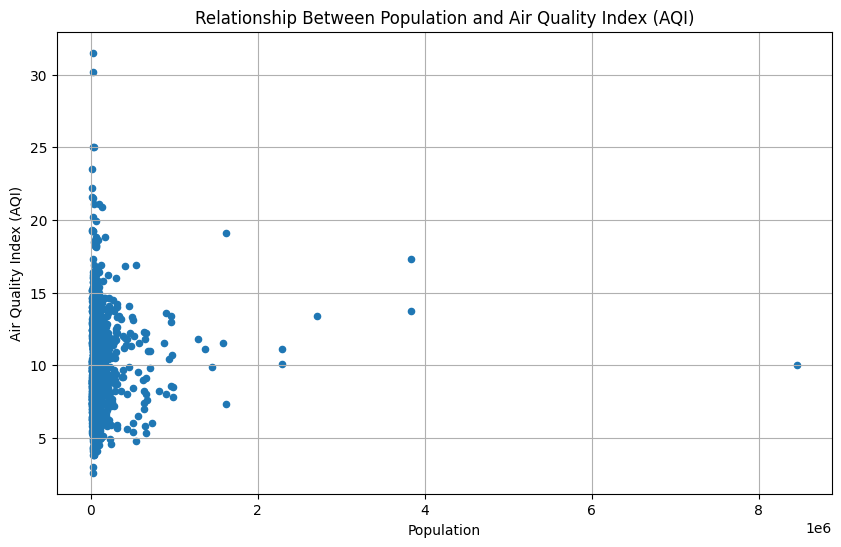

In [85]:
merged_df.plot(
    kind='scatter',
    x='Population',
    y='AQI',
    title='Relationship Between Population and Air Quality Index (AQI)',
    xlabel='Population',
    ylabel='Air Quality Index (AQI)',
    figsize=(10, 6),
    grid=True
)

*Answer to research question:* At first glance, we observe that some cities with large populations (toward the middle and right side of the chart) do not necessarily exhibit high AQI values. Even the city at the far right, which appears to be an outlier in terms of population, still falls within a moderate AQI range. This suggests that a high population does not directly imply poor air quality.

On the left side of the plot, representing smaller cities, AQI values vary significantly, from very low to relatively high. This wide distribution indicates that even among cities with low population counts, air quality can differ substantially.

Overall, the plot does not reveal a clear or strong relationship between population size and AQI. The variation in AQI across both small and large cities suggests that population alone is not a primary driver of air quality differences in this dataset. Other factors are likely at play.

<Axes: title={'center': 'AQI'}, xlabel='State'>

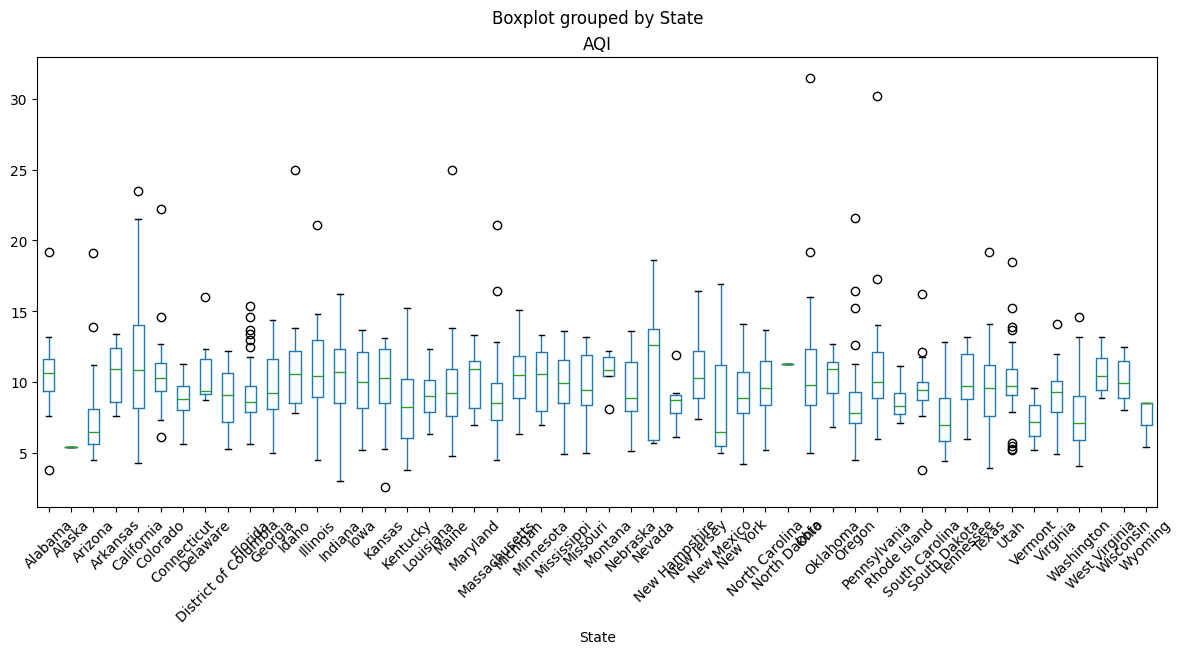

In [86]:
# Boxplot AQI par État
merged_df.boxplot(
    column='AQI',
    by='State',
    figsize=(14, 6),
    grid=False,
    rot=45
)

*Answer to research question:* To complement the city-level analysis, we also examined AQI variability at the state level. The boxplot reveals that some states show broad distributions of AQI, while others remain more uniform. For example, New York, despite having large and dense cities like New York City, shows a relatively moderate AQI range, whereas a less populated state like Montana has higher AQI values in some of its cities. This reinforces the idea that population alone is not a sufficient predictor of air quality, and that other environmental or industrial factors must be considered.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* Initially, choosing U.S. cities seemed like a good choice, as it reduced global variability, but we found that most cities had AQI levels in the "good" category. This limited the analysis to comparing "how good" the air was, rather than identifying highly polluted areas. If I had more time, I would try including cities from other countries to introduce more contrast in air quality. I'd also resolve the issue of cities with the same name having the same AQI, which likely introduced duplicates or inaccuracies. This structural would be worth fixing for a more precise analysis.